In [85]:
import pandas as pd
import numpy as np 

# Load the data and drop missing values

train = pd.read_csv('CMaps/train_FD001.txt', sep=' ', header=None)
test = pd.read_csv('CMaps/test_FD001.txt', sep=' ', header=None)
rul = pd.read_csv('CMaps/RUL_FD001.txt', sep=' ', header=None)

train = train.dropna(axis=1, how='all')
test = test.dropna(axis=1, how='all')
rul = rul.iloc[:, 0]

# Label the data

columns = (
    ["engine_id", "time_in_cycles"]
    + [f"op_setting_{i}" for i in range(1, 4)]  
    + [f"sensor_measurement_{i}" for i in range(1, 22)]  
)
train.columns = columns
test.columns = columns

# Check the data

print("Train DataFrame:")
print(train.head())
print("\nTest DataFrame:")
print(test.head())
print("\nRUL DataFrame:")
print(rul.head())

Train DataFrame:
   engine_id  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0          1               1       -0.0007       -0.0004         100.0   
1          1               2        0.0019       -0.0003         100.0   
2          1               3       -0.0043        0.0003         100.0   
3          1               4        0.0007        0.0000         100.0   
4          1               5       -0.0019       -0.0002         100.0   

   sensor_measurement_1  sensor_measurement_2  sensor_measurement_3  \
0                518.67                641.82               1589.70   
1                518.67                642.15               1591.82   
2                518.67                642.35               1587.99   
3                518.67                642.35               1582.79   
4                518.67                642.37               1582.85   

   sensor_measurement_4  sensor_measurement_5  ...  sensor_measurement_12  \
0               1400.60           

In [86]:
train.describe()

,engine_id,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [87]:
from scipy.stats import zscore

sensors = [col for col in train.columns if "sensor_measurement" in col]

threshold = 3
train_std = train[sensors].std()
sensor_std = train[sensors].std()
std_threshold = 0.1
sensors_cleaned = sensor_std[sensor_std > std_threshold].index.tolist()
z = train[sensors_cleaned].apply(zscore)

outliers = (z.abs() > threshold).any(axis=1)

print(f"Number of outliers detected by Z-Score: {outliers.sum()}")

# Count outliers per column
outliers_per_column = (z.abs() > threshold).sum()

# Display the count of outliers per column
print("Number of outliers detected in each sensor column:")
print(outliers_per_column)

train_cleaned = train[~outliers]

print(f"Shape of dataset after outlier removal: {train_cleaned.shape}")

Number of outliers detected by Z-Score: 769
Number of outliers detected in each sensor column:
sensor_measurement_2      31
sensor_measurement_3      47
sensor_measurement_4      36
sensor_measurement_7      34
sensor_measurement_9     521
sensor_measurement_11     23
sensor_measurement_12     34
sensor_measurement_14    496
sensor_measurement_17     81
sensor_measurement_20     43
sensor_measurement_21     34
dtype: int64
Shape of dataset after outlier removal: (19862, 26)


In [88]:
train_cleaned.describe()

,engine_id,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
count,19862.000000,19862.000000,19862.000000,19862.000000,19862.0,19862.00,19862.000000,19862.000000,19862.000000,1.986200e+04,...,19862.000000,19862.000000,19862.000000,19862.000000,1.986200e+04,19862.000000,19862.0,19862.0,19862.000000,19862.000000
mean,51.708237,105.153257,-0.000012,0.000002,100.0,518.67,642.650413,1590.137288,1408.334356,1.462000e+01,...,521.455450,2388.093622,8141.669414,8.439763,3.000000e-02,393.107341,2388.0,100.0,38.827650,23.296539
std,29.197432,66.993528,0.002187,0.000293,0.0,0.00,0.477099,5.813100,8.511620,3.552803e-15,...,0.708226,0.070428,13.935686,0.035709,1.387814e-17,1.460094,0.0,0.0,0.171565,0.102969
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1572.340000,1382.250000,1.462000e+01,...,519.220000,2387.880000,8099.940000,8.324900,3.000000e-02,389.000000,2388.0,100.0,38.280000,22.965000
25%,26.000000,50.000000,-0.001500,-0.000200,100.0,518.67,642.310000,1586.090000,1402.152500,1.462000e+01,...,521.010000,2388.040000,8133.060000,8.414100,3.000000e-02,392.000000,2388.0,100.0,38.720000,23.231000
50%,53.000000,100.000000,0.000000,0.000000,100.0,518.67,642.620000,1589.840000,1407.590000,1.462000e+01,...,521.510000,2388.090000,8140.240000,8.437100,3.000000e-02,393.000000,2388.0,100.0,38.840000,23.302700
75%,77.000000,151.000000,0.001500,0.000300,100.0,518.67,642.960000,1593.880000,1413.740000,1.462000e+01,...,521.970000,2388.140000,8147.450000,8.462500,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.369800
max,100.000000,361.000000,0.008700,0.000600,100.0,518.67,644.180000,1608.890000,1435.900000,1.462000e+01,...,523.380000,2388.390000,8200.920000,8.584800,3.000000e-02,397.000000,2388.0,100.0,39.340000,23.612700


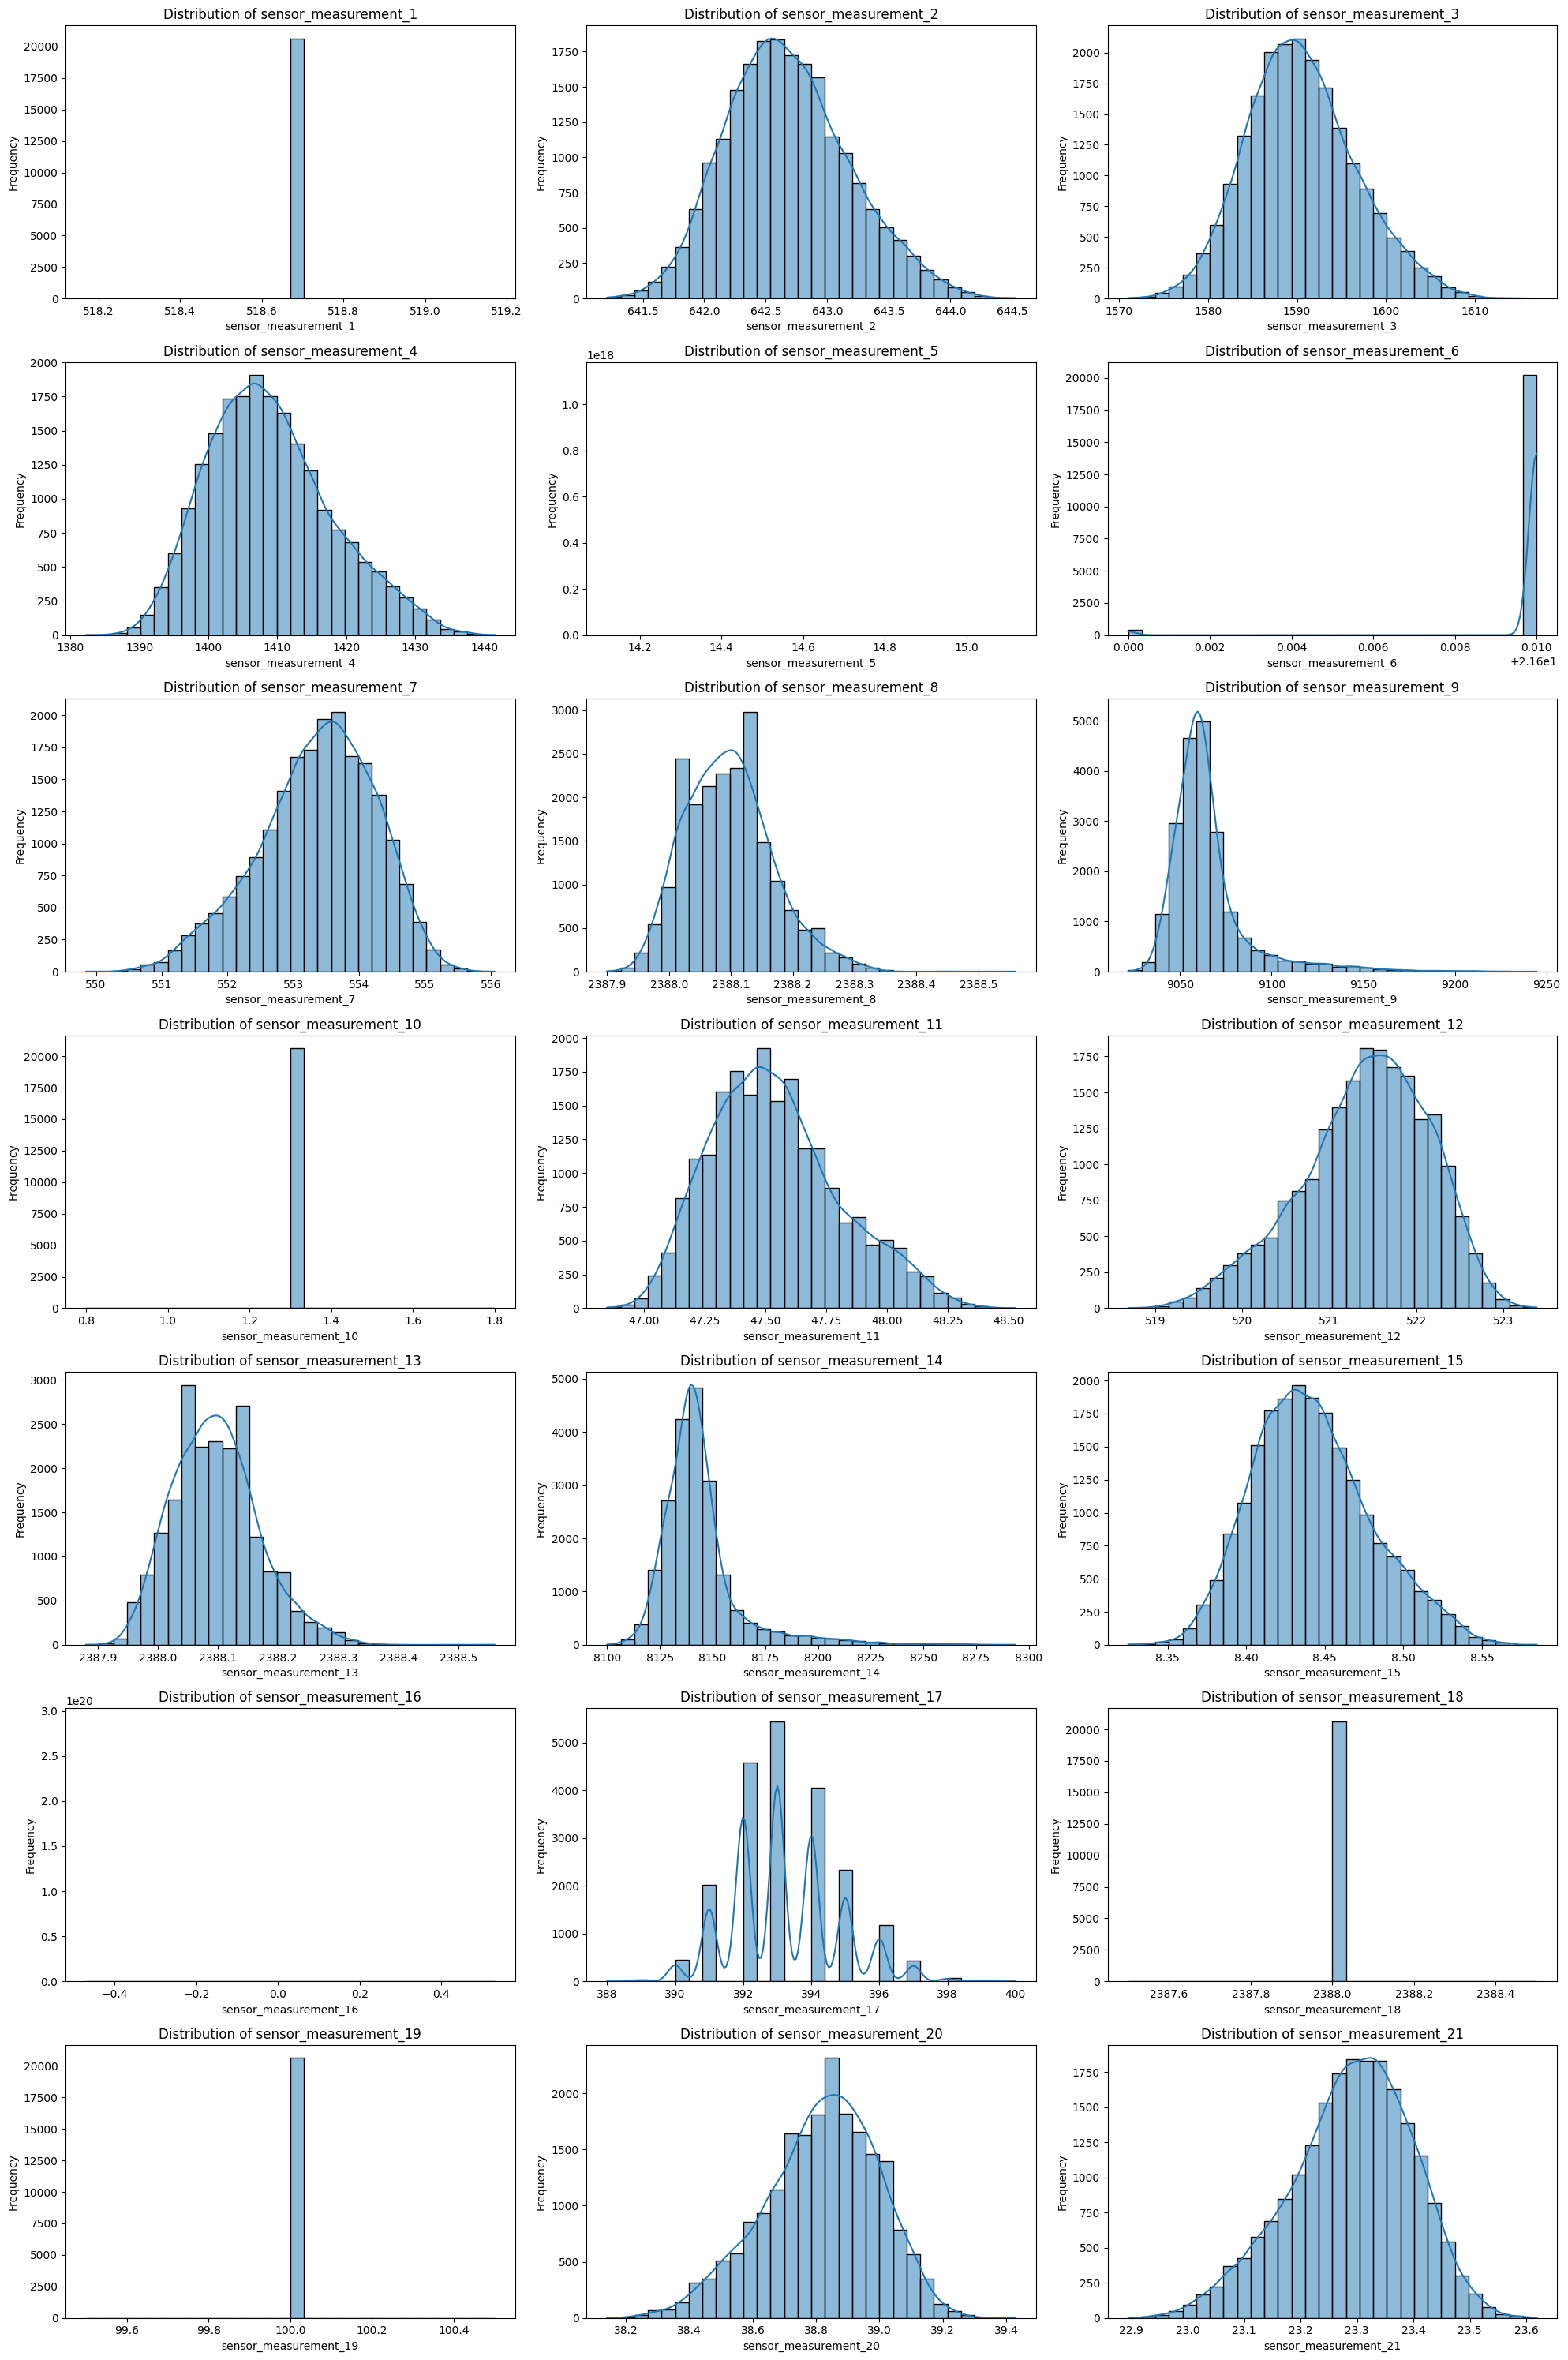

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 30))  
for i, sensor in enumerate(sensor_columns):
    plt.subplot(7, 3, i + 1)  
    sns.histplot(train[sensor], kde=True, bins=30)
    plt.title(f"Distribution of {sensor}")
    plt.xlabel(sensor)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

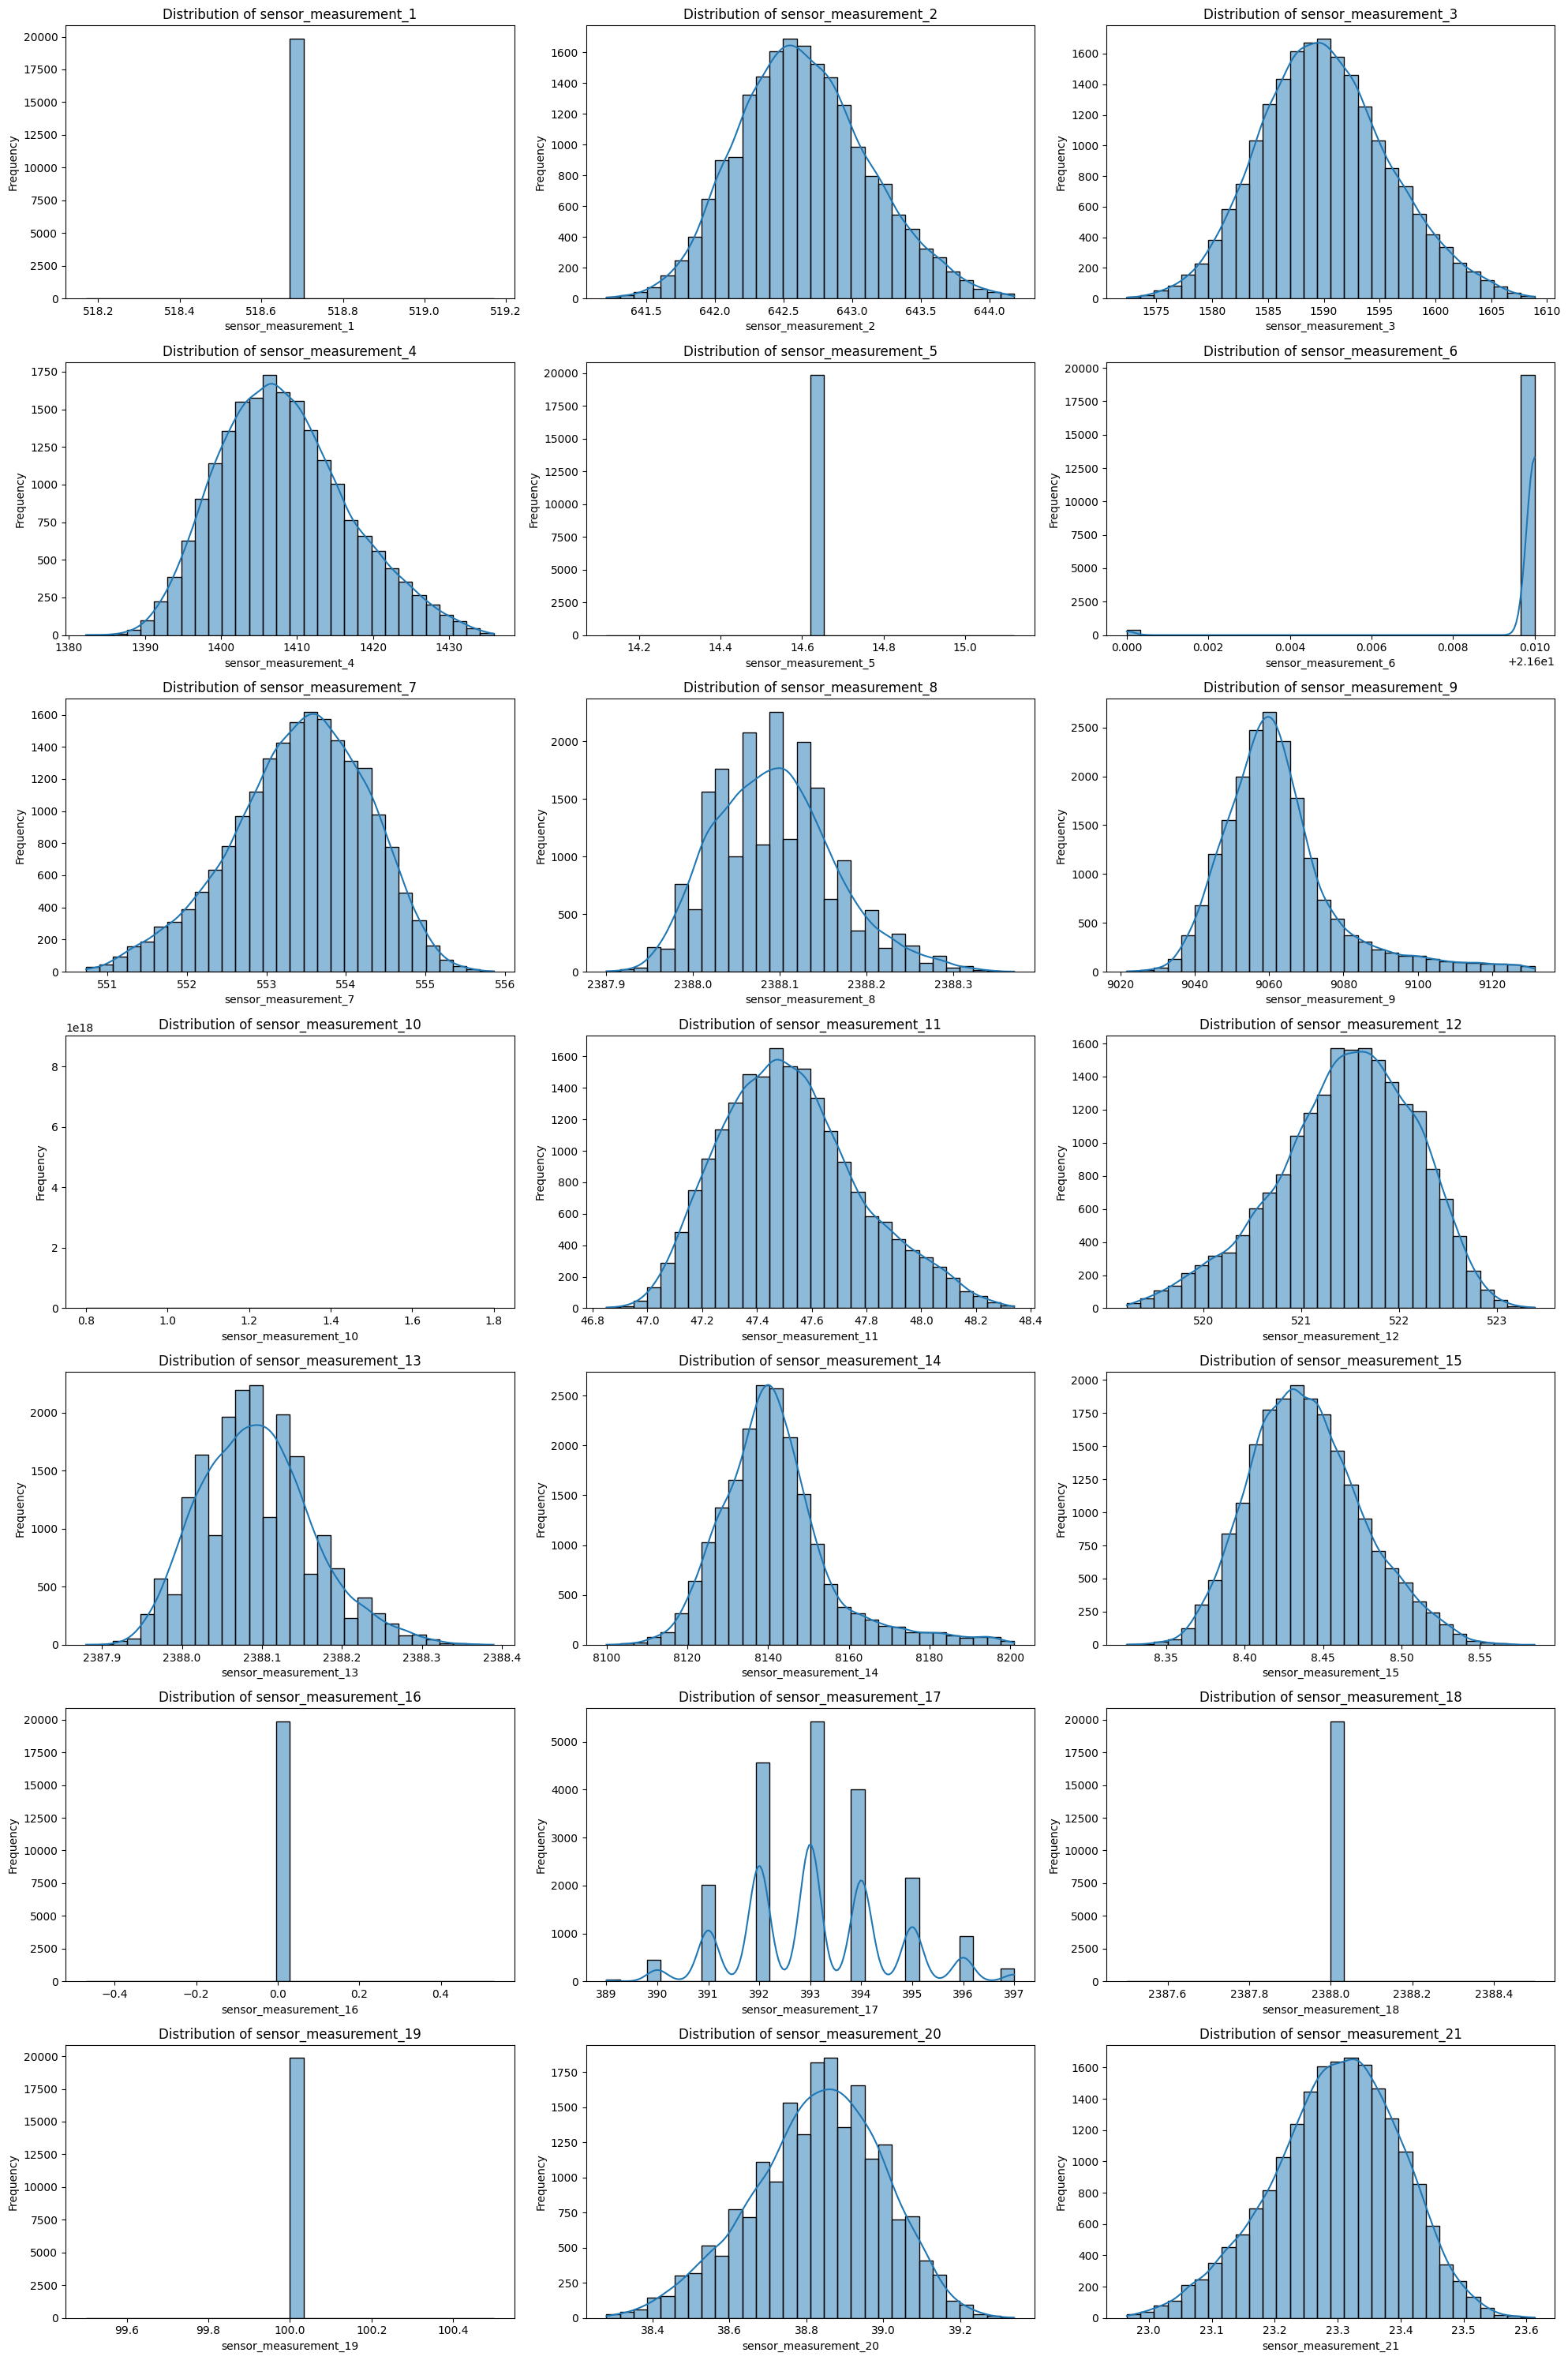

In [90]:
plt.figure(figsize=(20, 30)) 
for i, sensor in enumerate(sensor_columns):
    plt.subplot(7, 3, i + 1) 
    sns.histplot(train_cleaned[sensor], kde=True, bins=30)
    plt.title(f"Distribution of {sensor}")
    plt.xlabel(sensor)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

/var/folders/8w/97nsv7hj4b3f7bvgsxch69140000gn/T/ipykernel_7813/1410059437.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.375 0.375 0.125 ... 1.    0.75  0.875]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_cleaned.loc[:, normalize_cols] = scaler_minmax.transform(train_cleaned[normalize_cols])
/var/folders/8w/97nsv7hj4b3f7bvgsxch69140000gn/T/ipykernel_7813/1410059437.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.375 0.5   0.5   ... 0.75  0.75  0.875]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  test.loc[:, normalize_cols] = scaler_minmax.transform(test[normalize_cols])


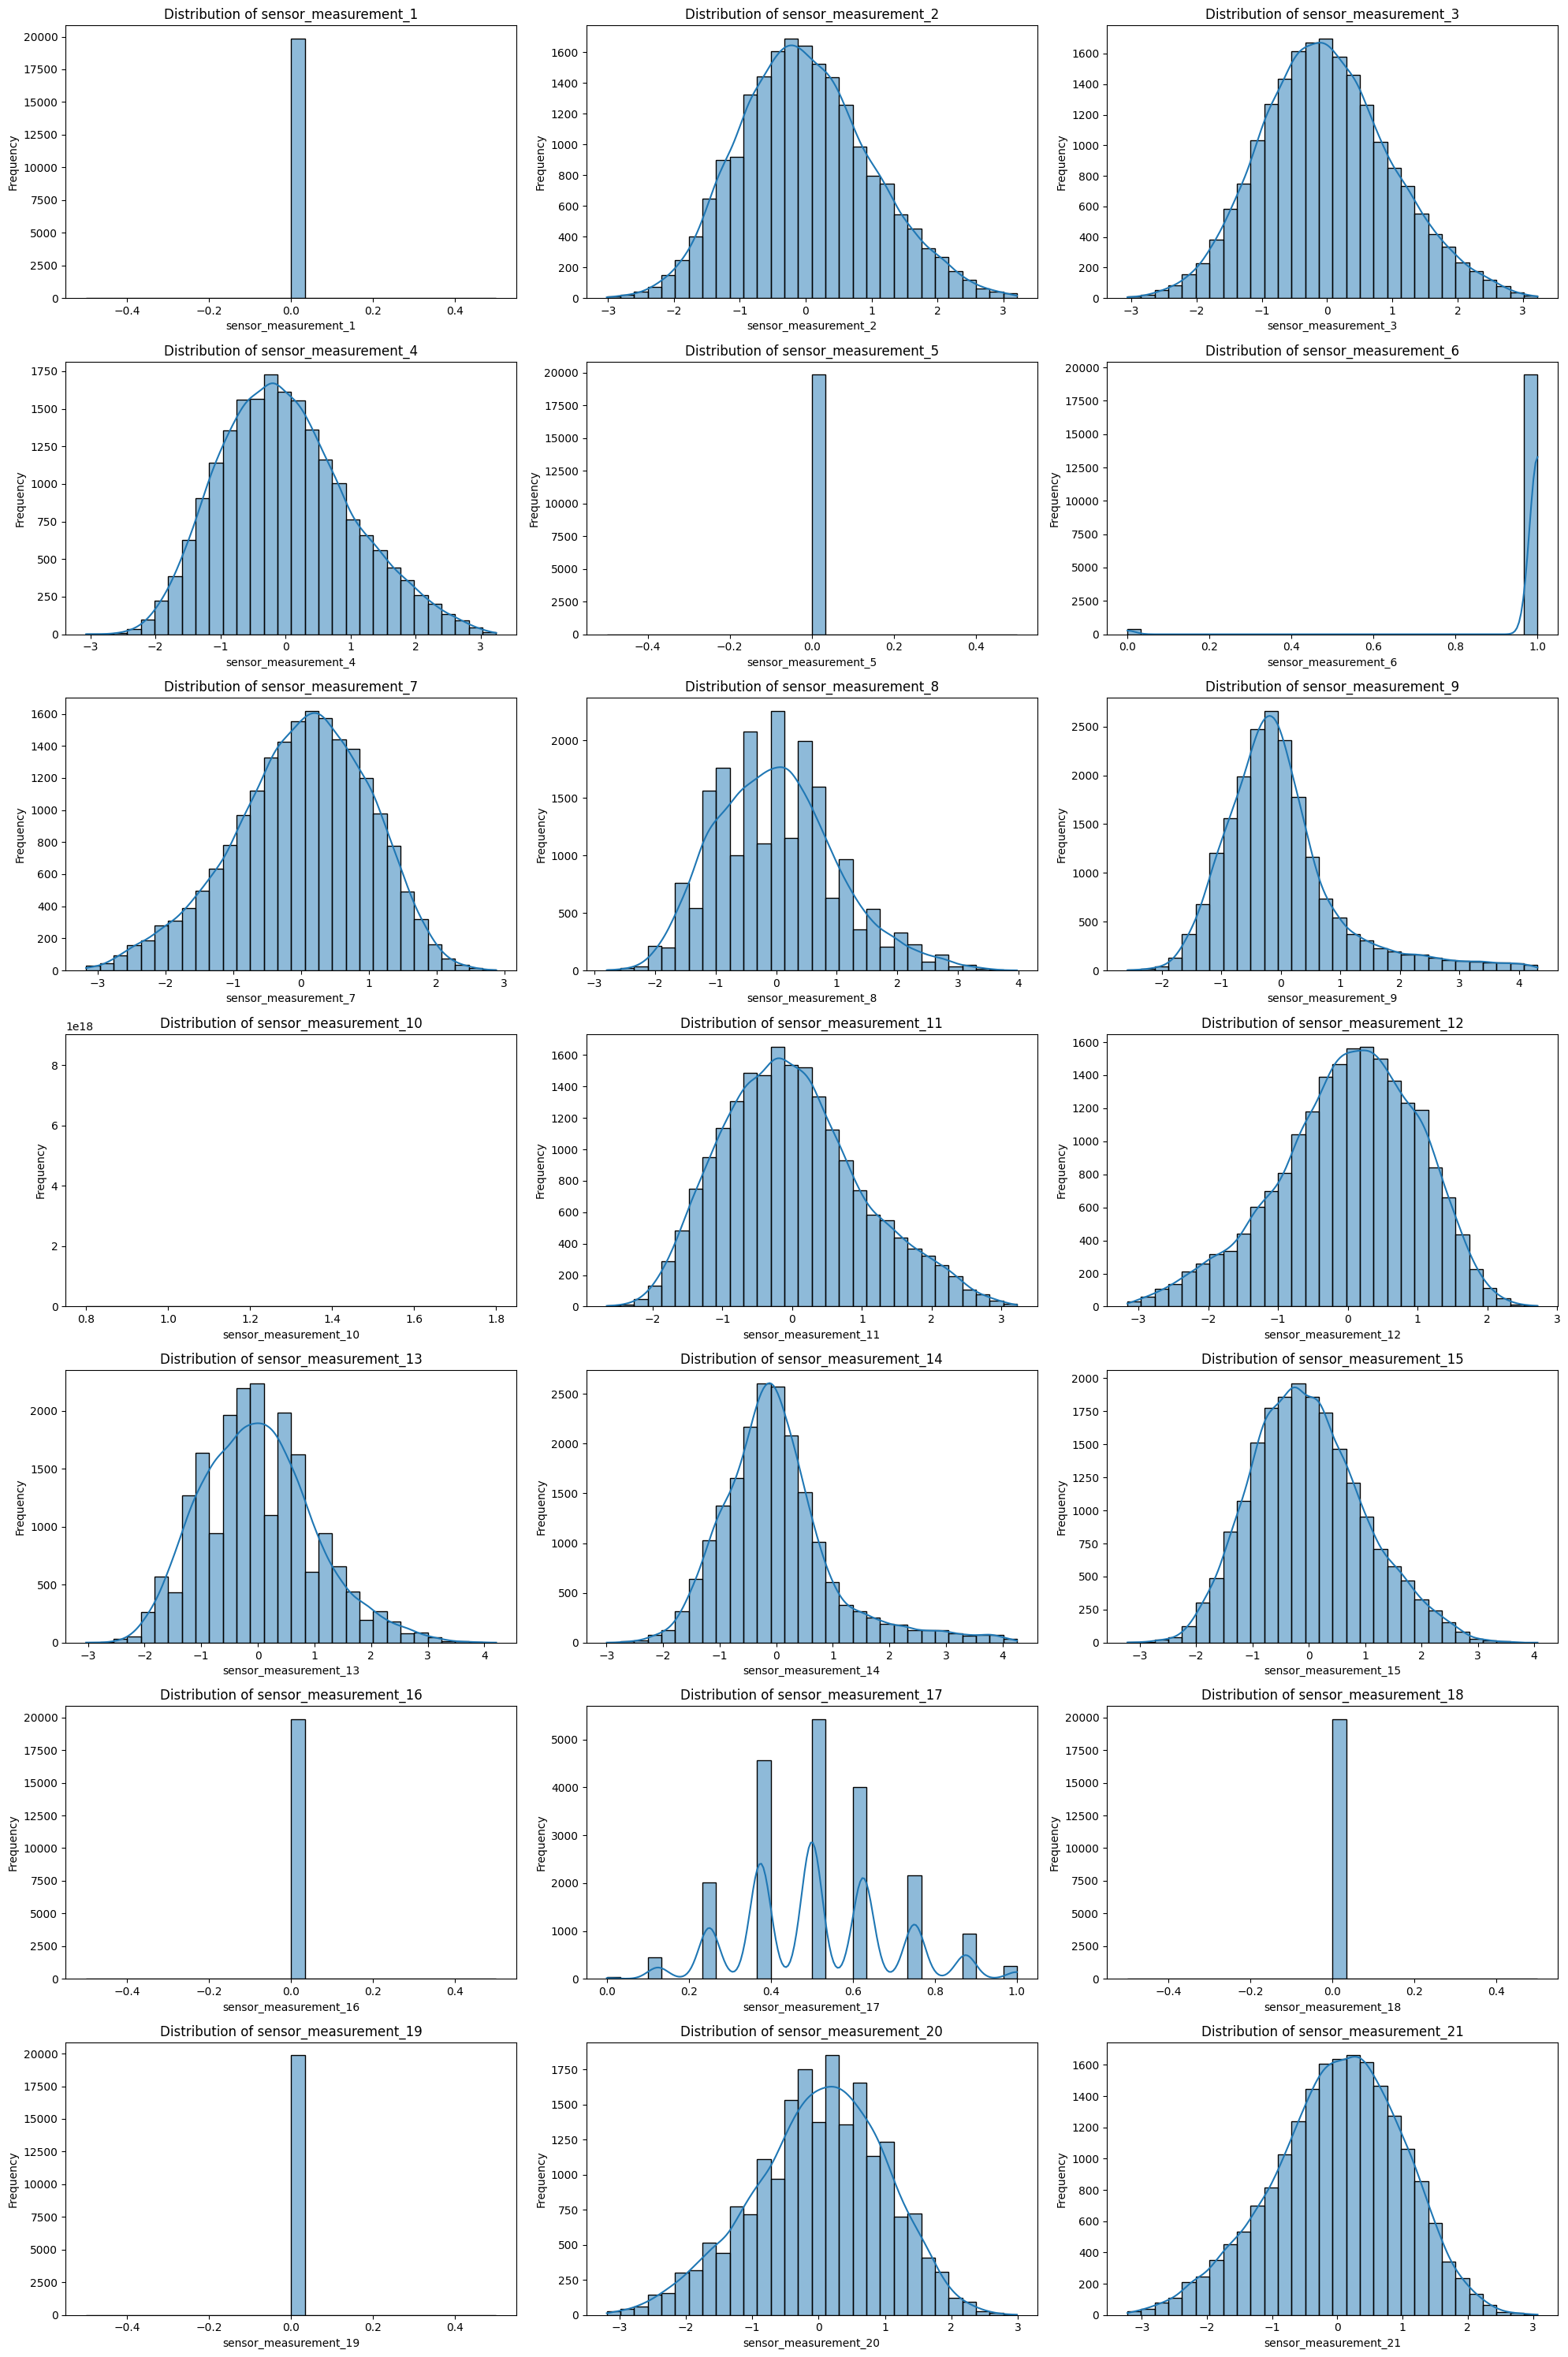

In [91]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standardize_cols = [
    "sensor_measurement_1", "sensor_measurement_2", "sensor_measurement_3", 
    "sensor_measurement_4", "sensor_measurement_7", "sensor_measurement_8",
    "sensor_measurement_9", "sensor_measurement_11", "sensor_measurement_12",
    "sensor_measurement_13", "sensor_measurement_14", "sensor_measurement_15",
    "sensor_measurement_19", "sensor_measurement_20", "sensor_measurement_21"
]

normalize_cols = [
    "sensor_measurement_5", "sensor_measurement_6", "sensor_measurement_16",
    "sensor_measurement_17", "sensor_measurement_18"
]

train_cleaned = train_cleaned.copy()

scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

scaler_std.fit(train_cleaned[standardize_cols])
scaler_minmax.fit(train_cleaned[normalize_cols])

train_cleaned.loc[:, standardize_cols] = scaler_std.transform(train_cleaned[standardize_cols])
test.loc[:, standardize_cols] = scaler_std.transform(test[standardize_cols])

train_cleaned.loc[:, normalize_cols] = scaler_minmax.transform(train_cleaned[normalize_cols])
test.loc[:, normalize_cols] = scaler_minmax.transform(test[normalize_cols])

plt.figure(figsize=(20, 30)) 
for i, sensor in enumerate(sensor_columns):
    plt.subplot(7, 3, i + 1) 
    sns.histplot(train_cleaned[sensor], kde=True, bins=30)
    plt.title(f"Distribution of {sensor}")
    plt.xlabel(sensor)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

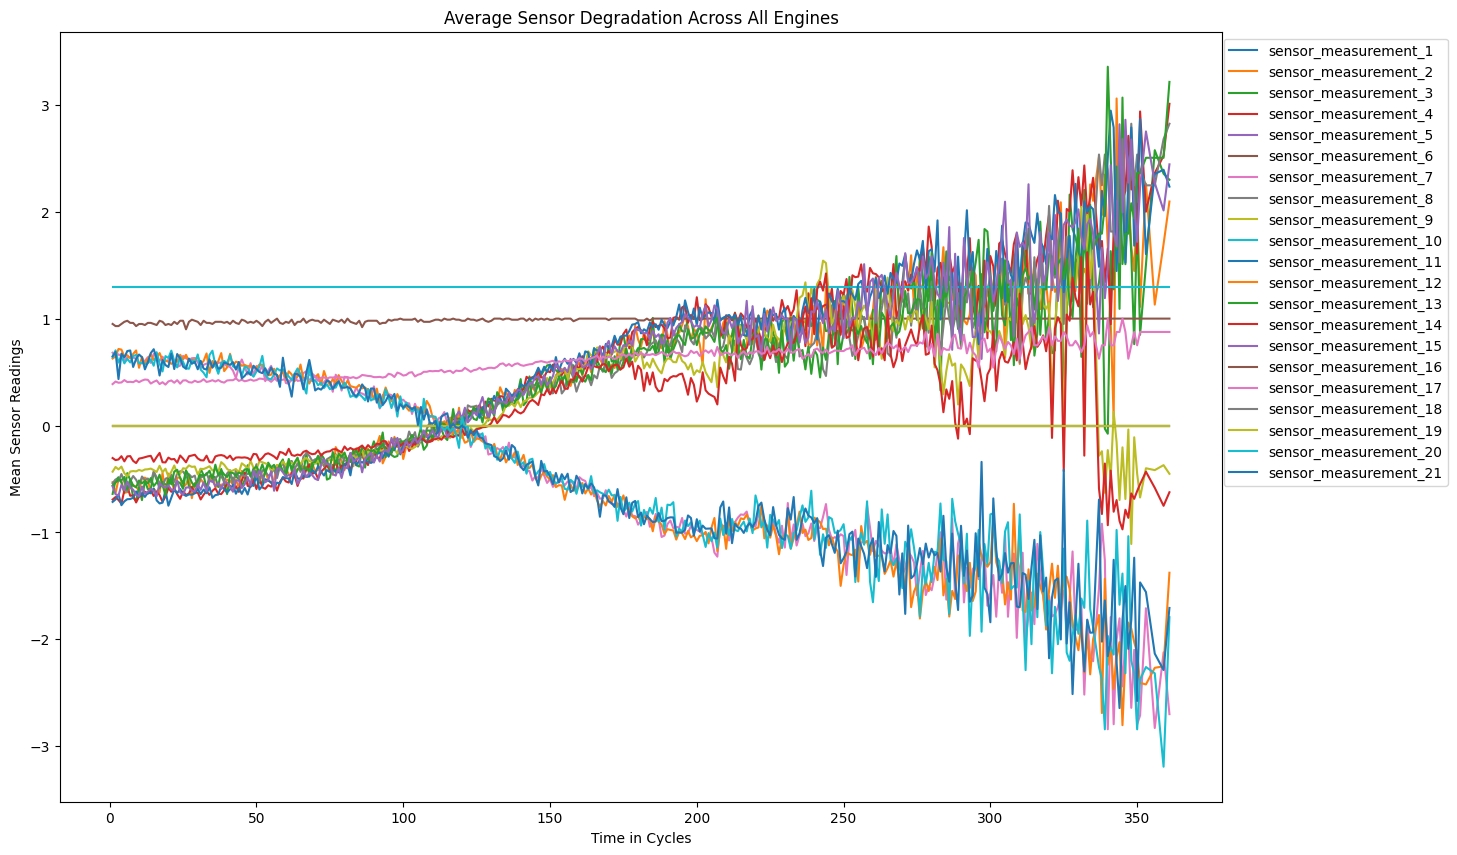

In [92]:
avg_sensor_readings = train_cleaned.groupby("time_in_cycles")[sensors].mean()

plt.figure(figsize=(15, 10))
for sensor in sensors:
    plt.plot(avg_sensor_readings.index, avg_sensor_readings[sensor], label=sensor)
plt.xlabel("Time in Cycles")
plt.ylabel("Mean Sensor Readings")
plt.title("Average Sensor Degradation Across All Engines")
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [109]:
import torch
import torch.nn as nn

class LSTMRULPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=1):
        """
        input_size:  number of features per time step (e.g., 21 sensors)
        hidden_size: dimension of LSTM hidden states
        num_layers:  number of stacked LSTM layers
        """
        super(LSTMRULPredictor, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True  # Input/Output is (batch, seq, feature)
        )
        # Final regression layer outputs 1 value (the predicted RUL)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        """
        x: shape (B, T, N)
        Returns: shape (B, 1) for the RUL prediction
        """
        # LSTM output: out shape = (B, T, hidden_size)
        # h_n, c_n shapes = (num_layers, B, hidden_size)
        out, (h_n, c_n) = self.lstm(x)
        
        # We'll use the last time step's output for RUL
        # out[:, -1, :] is shape (B, hidden_size)
        last_output = out[:, -1, :]
        
        # Pass through a linear layer to get the final RUL prediction
        rul_pred = self.fc(last_output)  # shape (B, 1)
        return rul_pred

In [115]:
from torch.utils.data import DataLoader, TensorDataset

# Suppose we have 100 samples, each is a 30-length sequence with 21 features
num_samples = len(train_cleaned) 
seq_length = 30
num_features = 21

X_data = torch.randn(num_samples, seq_length, num_features)  # [100, 30, 21]
y_data = torch.rand(num_samples, 1)                          # [100, 1] RUL target

dataset = TensorDataset(X_data, y_data)
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)

In [116]:
# Hyperparameters
hidden_size = 64
num_layers = 1
learning_rate = 1e-3
num_epochs = 5

# Instantiate the model
model = LSTMRULPredictor(input_size=num_features, hidden_size=hidden_size, num_layers=num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for X_batch, y_batch in train_loader:
        # Move data to device
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        optimizer.zero_grad()         # Reset gradients
        y_pred = model(X_batch)       # Forward pass -> (B, 1)
        loss = criterion(y_pred, y_batch)
        loss.backward()               # Backprop
        optimizer.step()              # Update weights
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}] - Loss: {epoch_loss:.4f}")

Epoch [1/5] - Loss: 0.0895
Epoch [2/5] - Loss: 0.0848
Epoch [3/5] - Loss: 0.0842
Epoch [4/5] - Loss: 0.0837
Epoch [5/5] - Loss: 0.0830


In [117]:
import torch
import torch.nn.functional as F

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


model.eval()
test_preds = []
test_targets = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        # Forward pass
        y_pred = model(X_batch)  # shape [B, 1]
        
        # Collect
        test_preds.append(y_pred.cpu())
        test_targets.append(y_batch.cpu())

test_preds = torch.cat(test_preds, dim=0)      # shape [num_test_samples, 1]
test_targets = torch.cat(test_targets, dim=0)  # shape [num_test_samples, 1]

mse = F.mse_loss(test_preds, test_targets).item()
rmse = mse ** 0.5
mae = F.l1_loss(test_preds, test_targets).item()

print(f"Test MSE:  {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE:  {mae:.4f}")

Test MSE:  7030.2627
Test RMSE: 83.8467
Test MAE:  71.8146


In [119]:
len(rul)                                            

100

In [120]:
len(test)

13096